# Project 2
## Lars Bosch, Philipp Brückelt, Thomas Engl

Import the python scripts and execute the code in this Notebook.

In [2]:
## import the python scripts
from neural_network import *
from data_sets import *
from optimizers import *
from visualize import *

In [3]:
## import other modules
import autograd.numpy as np

# Exercise b)
The following code constructs a neural network which approximates the 1D Runge function. The first example uses 2 hidden layers with 50 and 100 nodes and only the sigmoid function as activation function. The cost function is given by the MSE.

In [20]:
np.random.seed(0)                               # set a seed
n = 1000                                        # number of points

layer_output_sizes = [50, 100, 1]               # define number of nodes in layers (output size is 1)
activation_funcs = [ReLU, sigmoid, identity]    # activation functions
    
cost_fnc = mse                                  # choose mse as cost function
optimize_algorithm = Momentum(eta=0.015,         # optimizer: gradient descent with momentum
                              momentum=0.8)
output_size = 1

MSE first guess:      232.1028115142099
MSE after training:   0.012970111670686806


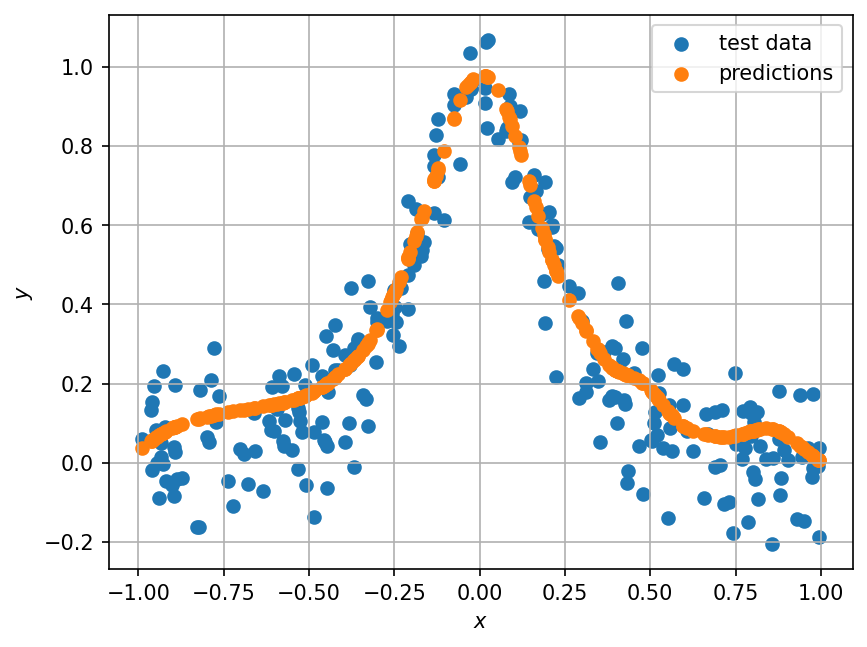

In [22]:
### 1D Runge function
input_size = 1
data = load_runge_data(n)
mse_first_guess, mse_after_training, _, predictions = test_accuracy(
                                                        data, activation_funcs, layer_output_sizes, 
                                                        input_size, output_size, cost_fnc, optimize_algorithm,
                                                        epochs_=500, return_predicts=True)
print("MSE first guess:     ", mse_first_guess)
print("MSE after training:  ", mse_after_training)

""" plot of the approximation and the input data """
### should update this after scaling data
plot_1D_approx(data[1], data[3], predictions)

Next, we create a heat map which visualizes the dependence of the test accuracy on the number of hidden layers and number of nodes per layer. Again, we only use the sigmoid function. As optimization algorithm we use Gradient descent with momentum.

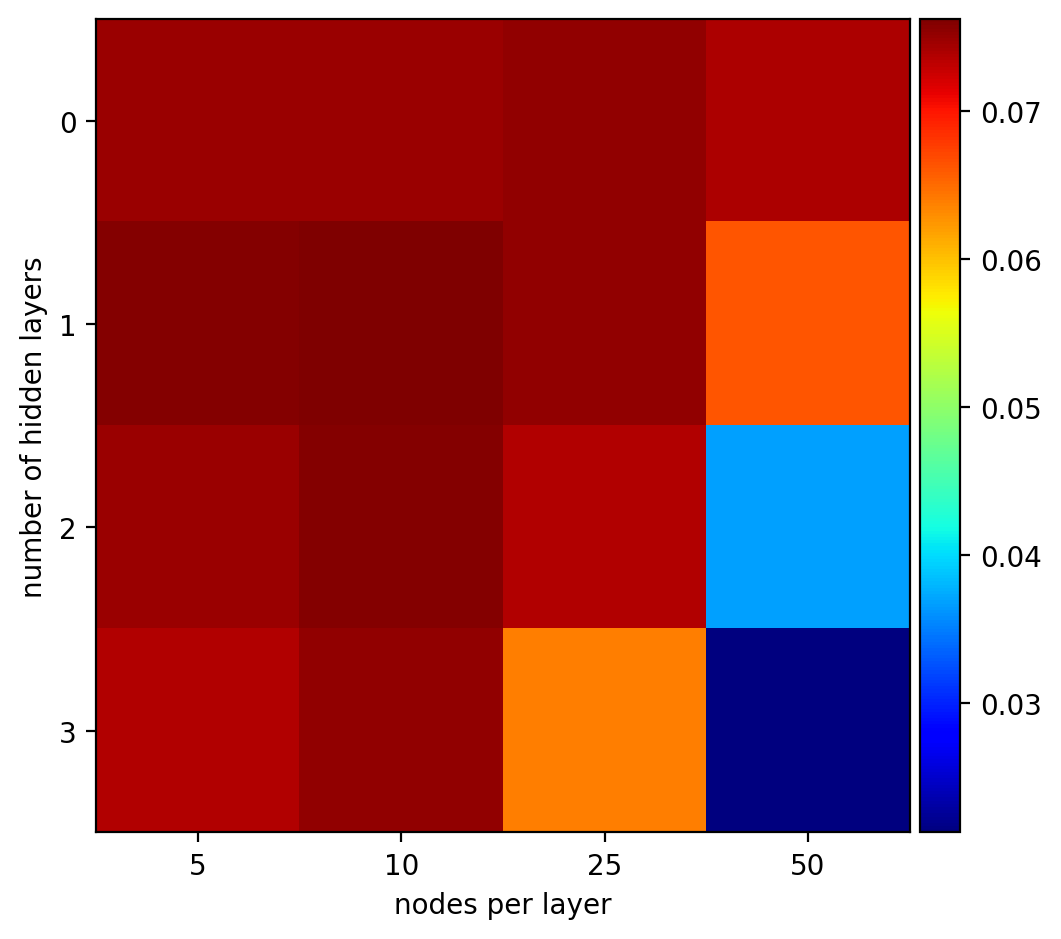

In [5]:
""" plot the dependence of the test accuracy on the number of hidden layers
    # and number of nodes per layer. Here, we only use the sigmoid function
    # as activation function """
heat_map_test_accuracy(load_runge_data(n), [0, 1, 2, 3], [5, 10, 25, 50], 
                       input_size, output_size, mse, Momentum(eta=0.01, momentum=0.9))

Now, we approximate the Runge function again, but use ReLU instead of Sigmoid in the first hidden layer.

In [58]:
activation_funcs = [ReLU, sigmoid, identity]     # activation functions

mse_1, mse_2 = test_accuracy(data, activation_funcs, layer_output_sizes, 
                                                    input_size, output_size, cost_fnc, optimize_algorithm)
print("MSE for first guess: ", mse_1)
print("MSE after training:  ", mse_2)

MSE for first guess:  16.738908792209862
MSE after training:   0.011787645220612677


# Extension - 2D functions
We can also try more sophisticated functions, e.g., the 2D Runge function.

In [25]:
### 2D Runge function
data = load_runge2D_data(n)
input_size = 2
mse_1, mse_2 = test_accuracy(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, optimize_algorithm)
print("MSE for first guess: ", mse_1)
print("MSE after training:  ", mse_2)

MSE for first guess:  17.005245788744393
MSE after training:   0.023748063609946825


Another interesting example is the Rastrigin function, defined as
$$
f(x) := 20 + x^2 - 10\cos(2 \pi x) + y^2 - 10\cos(2 \pi y).
$$

In [26]:
### Rastrigin function
data = load_rastrigin_data(n)
mse_1, mse_2 = test_accuracy(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, optimize_algorithm)
print("MSE for first guess: ", mse_1)
print("MSE after training:  ", mse_2)

MSE for first guess:  879.7261729528846
MSE after training:   66.56588012691782


# some more test with the 2D runge function
## test different network depths, activation functions ect.

In [29]:
np.random.seed(0)
data = load_runge2D_data(n)

# one hidden layer with 50 neurons, only sigmoid
layer_output_sizes = [50, 1]
activation_funcs = [sigmoid, identity]
mse_1, mse_2 = test_accuracy(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, optimize_algorithm)
print("one hidden layer, 50 neurons, sigmoid:")
print("MSE for first guess: ", mse_1)
print("MSE after training:  ", mse_2, "\n")

# three hidden layers, ReLU, LeakyReLU and sigmoid
layer_output_sizes = [50, 100, 50, 1]
activation_funcs = [ReLU, LeakyReLU, sigmoid, identity]
mse_1, mse_2 = test_accuracy(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, optimize_algorithm)
print("three hidden layer, 50 / 100 / 50 neurons, ReLU, LeakyReLU, sigmoid:")
print("MSE for first guess: ", mse_1)
print("MSE after training:  ", mse_2, "\n")

# three hidden layers, ReLU, ReLU and sigmoid
activation_funcs = [ReLU, ReLU, sigmoid, identity]
mse_1, mse_2 = test_accuracy(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, optimize_algorithm)
print("three hidden layer, 50 / 100 / 50 neurons, ReLU, ReLU, sigmoid:")
print("MSE for first guess: ", mse_1)
print("MSE after training:  ", mse_2, "\n")

# three hidden layers, ReLU, sigmoid and sigmoid
layer_output_sizes = [50, 100, 100, 1]
activation_funcs = [ReLU, sigmoid, sigmoid, identity]
mse_1, mse_2 = test_accuracy(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, optimize_algorithm)
print("three hidden layer, 50 / 100 / 100 neurons, ReLU, ReLU, sigmoid:")
print("MSE for first guess: ", mse_1)
print("MSE after training:  ", mse_2, "\n")

# three hidden layers, ReLU, ReLU and sigmoid
activation_funcs = [ReLU, ReLU, sigmoid, identity]
mse_1, mse_2 = test_accuracy(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, optimize_algorithm)
print("three hidden layer, 50 / 100 / 100 neurons, ReLU, ReLU, sigmoid:")
print("MSE for first guess: ", mse_1)
print("MSE after training:  ", mse_2, "\n")

# four hidden layers, ReLU, sigmoid, LeakyReLU and sigmoid
layer_output_sizes = [50, 100, 50, 100, 1]
activation_funcs = [ReLU, sigmoid, LeakyReLU, sigmoid, identity]
mse_1, mse_2 = test_accuracy(data, activation_funcs, layer_output_sizes, 
                             input_size, output_size, cost_fnc, optimize_algorithm)
print("four hidden layer, 50 / 100 / 50 / 100 neurons, ReLU, sigmoid, LeakyReLU, sigmoid:")
print("MSE for first guess: ", mse_1)
print("MSE after training:  ", mse_2, "\n")

one hidden layer, 50 neurons, sigmoid:
MSE for first guess:  22.03286651884131
MSE after training:   0.023580258840984945 

three hidden layer, 50 / 100 / 50 neurons, ReLU, LeakyReLU, sigmoid:
MSE for first guess:  16.95091746349941
MSE after training:   0.021872118881775284 

three hidden layer, 50 / 100 / 50 neurons, ReLU, ReLU, sigmoid:
MSE for first guess:  33.67918924085197
MSE after training:   0.030409700583831713 

three hidden layer, 50 / 100 / 100 neurons, ReLU, ReLU, sigmoid:
MSE for first guess:  51.29872159741877
MSE after training:   0.01603524285439823 

three hidden layer, 50 / 100 / 100 neurons, ReLU, ReLU, sigmoid:
MSE for first guess:  44.18231574481429
MSE after training:   0.014909972434832188 

four hidden layer, 50 / 100 / 50 / 100 neurons, ReLU, sigmoid, LeakyReLU, sigmoid:
MSE for first guess:  3.850779412017009
MSE after training:   0.01712836568897559 



# Exercise f) Classification analysis 

In [9]:
# mnist data set, already scaled and splitted in train and test data
# somehow it tells me that fetch_openml (see data_sets.py) got an unexpected keyword argument 'parser' even though this is used
# in the documentation and also in the exercises for project 2...
# data = load_mnist() 
# print(data[0])
# input_size = np.shape(data[0][1])
""" compute test accuracy of our network applied to the minist data set. 
We leave the activation functions, layers etc as they are for the first test """
# _, test_acc = test_accuracy(data, activation_funcs, input_size, )

TypeError: fetch_openml() got an unexpected keyword argument 'parser'